# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

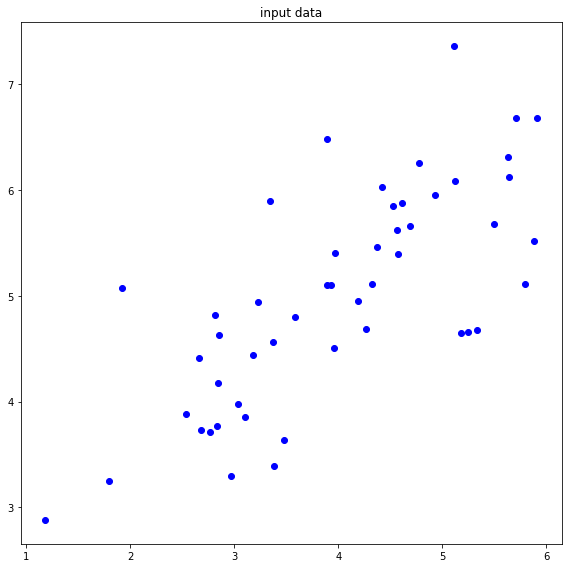

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [4]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    feature_normalize = (feature - np.mean(feature, axis = 0)) / np.std(feature, axis = 0)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [5]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

print(max_x, max_y)

1.655127905467599 2.329821422845136


## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [6]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature_T = np.transpose(feature)
    
    Sigma = np.cov(feature_T)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [7]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #    
    Sigma = compute_covariance(feature)
    eigenValue, eigenVector = np.linalg.eig(Sigma)
    a = np.argsort(eigenValue)
    principal_component_1 = eigenVector[:, a[-1]] * eigenValue[a[-1]]
    principal_component_2 = eigenVector[:, a[-2]] * eigenValue[a[-2]]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [8]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    c = np.dot(feature, vector.reshape(2, 1))
    projection = np.zeros(shape=(c.shape[0], vector.shape[0]))
    for i, cc in enumerate(c):
        projection[i:,] = cc * vector

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [9]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

print(principal_component_1, principal_component_2)

# print(np.dot(feature, principal_component_1)/ np.dot(feature, principal_component_1) *  principal_component_1)
Sigma = compute_covariance(feature)
eigenValue, eigenVector = np.linalg.eig(Sigma)
projection1 = compute_projection_onto_line(feature, principal_component_1/eigenValue[0])
projection2 = compute_projection_onto_line(feature, principal_component_2/eigenValue[1])

[1.25225004 1.25225004] [-0.19082503  0.19082503]


---

---

## functions for presenting the results

---

---

In [10]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [11]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #    
    plt.arrow(0, 0, principal_component_1[0], principal_component_1[1], head_width=0.1, head_length=0.1, color="r")
    plt.arrow(0, 0, principal_component_2[0], principal_component_2[1], head_width=0.1, head_length=0.1, color="g")
    plt.scatter(x, y, color='blue')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [12]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #    
    new_x = x
    new_y = (principal_component_1[1] / principal_component_1[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [13]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    new_x = x
    new_y = (principal_component_2[1] / principal_component_2[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [14]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    new_x = x
    new_y = (principal_component_1[1] / principal_component_1[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')
    
    plt.plot(projection1[:, 0], projection1[:, 1], 'go')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [15]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    new_x = x
    new_y = (principal_component_2[1] / principal_component_2[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')

    plt.plot(projection2[:, 0], projection2[:, 1], 'go')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [16]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    new_x = x
    new_y = (principal_component_1[1] / principal_component_1[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')
    
    plt.plot(projection1[:, 0], projection1[:, 1], 'go')
    
    direc = feature - projection1
    for i in range(len(direc)):
        plt.arrow(projection1[i,0], projection1[i,1], direc[i,0], direc[i,1],color = 'gray')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [17]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    new_x = x
    new_y = (principal_component_2[1] / principal_component_2[0]) * new_x
    plt.plot(new_x, new_y, c='r')
    plt.scatter(x, y, color='blue')

    plt.plot(projection2[:, 0], projection2[:, 1], 'go')
    
    direc = feature - projection2
    for i in range(len(direc)):
        plt.arrow(projection2[i, 0], projection2[i, 1], direc[i, 0], direc[i,1], color='gray')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


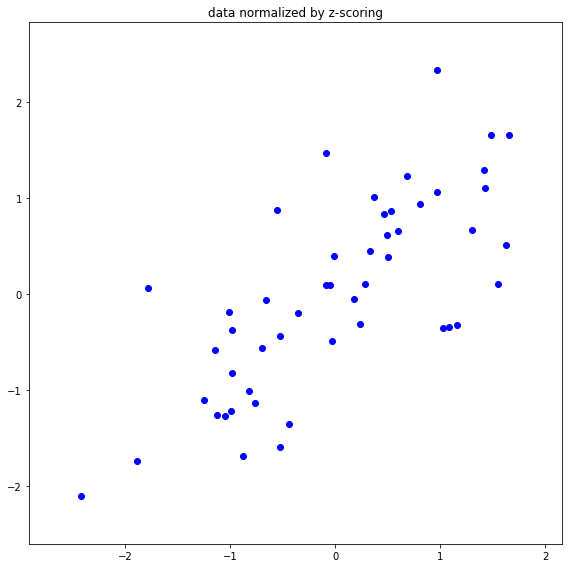

**************************************************
## [RESULT 02]
**************************************************


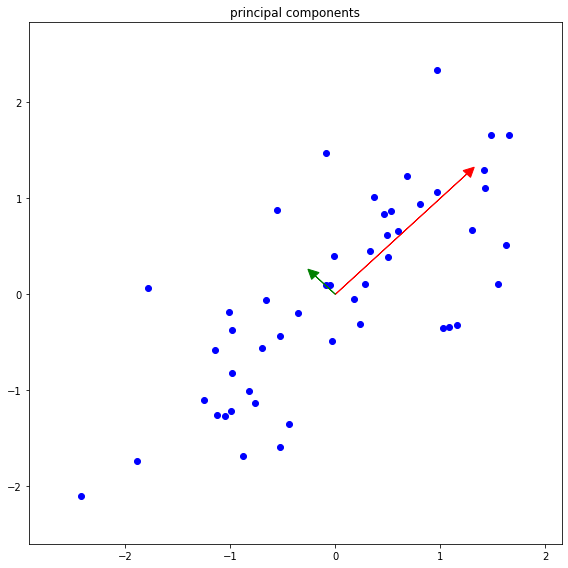

**************************************************
## [RESULT 03]
**************************************************


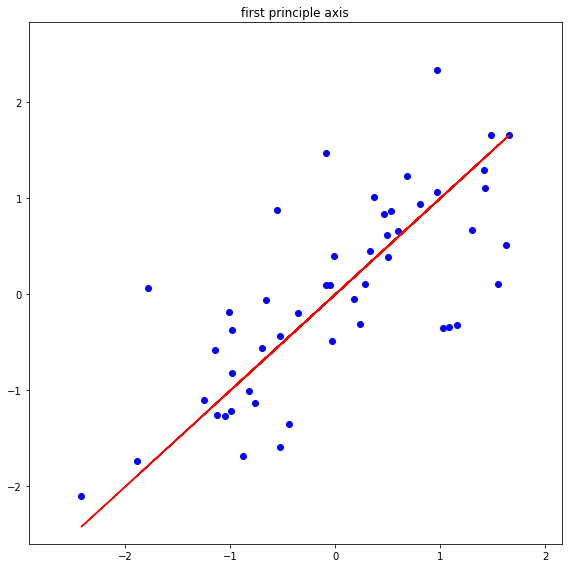

**************************************************
## [RESULT 04]
**************************************************


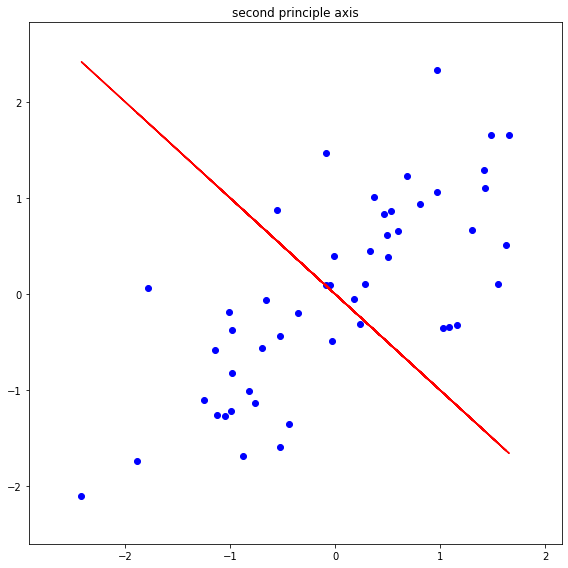

**************************************************
## [RESULT 05]
**************************************************


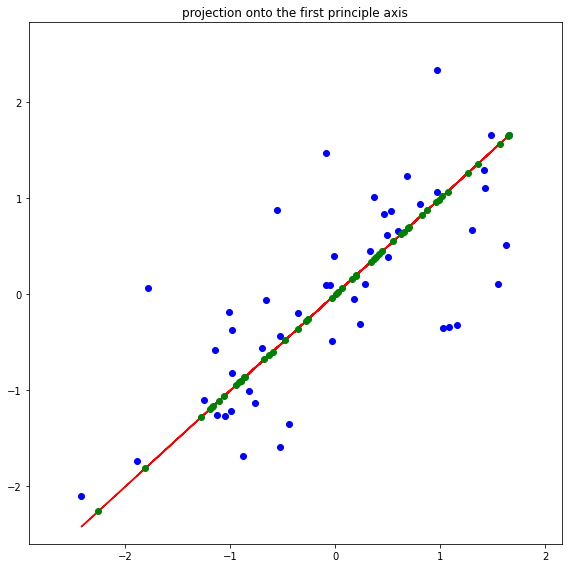

**************************************************
## [RESULT 06]
**************************************************


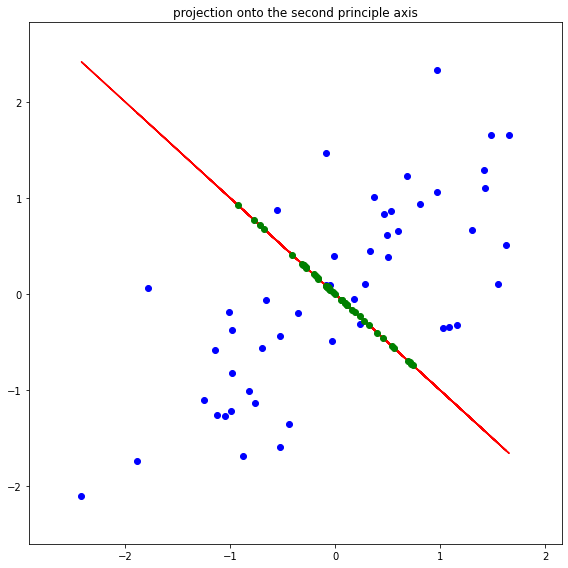

**************************************************
## [RESULT 07]
**************************************************


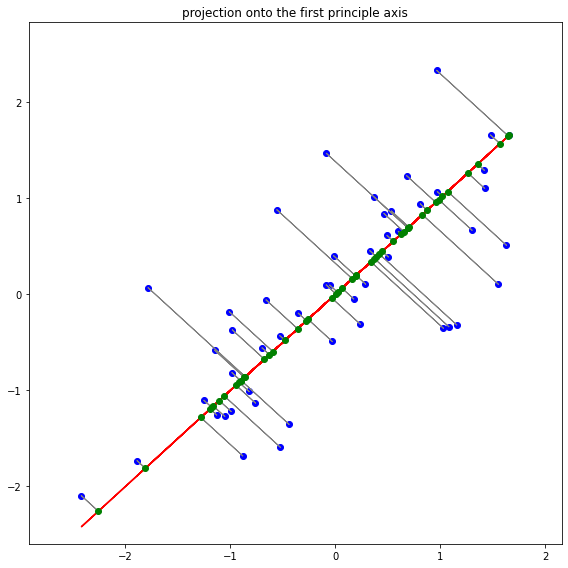

**************************************************
## [RESULT 08]
**************************************************


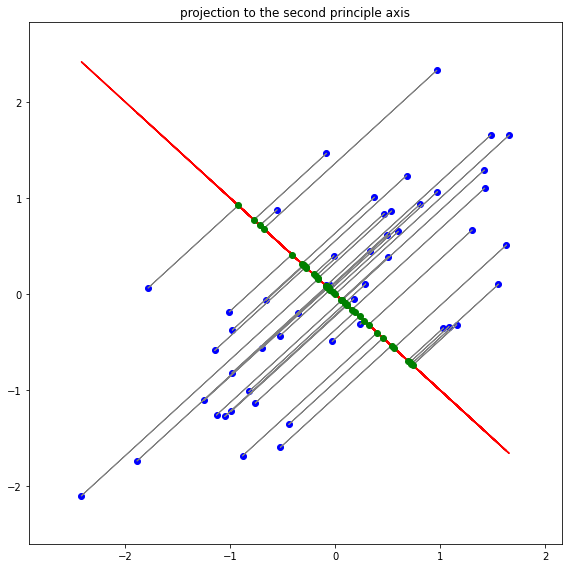

In [18]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)